# Ensembles

In [149]:
# Get basic libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#plt.style.use("fivethirtyeight")

In [150]:
# Figure Customization
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['image.cmap'] = 'viridis'

In [151]:
# Font Settings
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '18'

In [152]:
# Save Figure Customization
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.5

In [190]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.labelpad'] = 10
#plt.rcParams['axes3d.grid'] = False

In [154]:
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.linewidth"] = 0.3
plt.rcParams["grid.color"] = (0.5, 0.5, 0.5, 0.5)

In [155]:
# Line Customization
plt.rcParams['lines.linewidth'] = 0.3

In [156]:
# Tick Customization
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.pad'] = 10.0
plt.rcParams['ytick.major.pad'] = 10.0
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8


In [192]:
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            #ax.spines['right'].set_color('none')
            #ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('none')
            ax.yaxis.set_ticks_position('none')

In [158]:
# Get Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier

In [159]:
# Create metrics to store
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split

In [160]:
# Create datasets for demo
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

## Create Dataset & Preprocessing

In [161]:
# Create a 10 feature dataset to do the analysis
X8, y = make_classification(n_samples = 1000, n_features=8, n_redundant=0, 
                             n_informative=8, random_state=250, n_classes = 2)

In [162]:
# Actual 3 variable dataset for our example
X = MDS(n_components=3, n_jobs=-1).fit_transform(X8)
X = StandardScaler().fit_transform(X)

## Create Additional Feature Set

In [163]:
# Create a pca function to transform 3 features to 2 dimensions
pca = PCA(n_components=2).fit(X)

In [164]:
XT = pca.transform(X)

In [165]:
X = np.c_[X, XT]

In [166]:
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=123)

## Visualise the Dataset

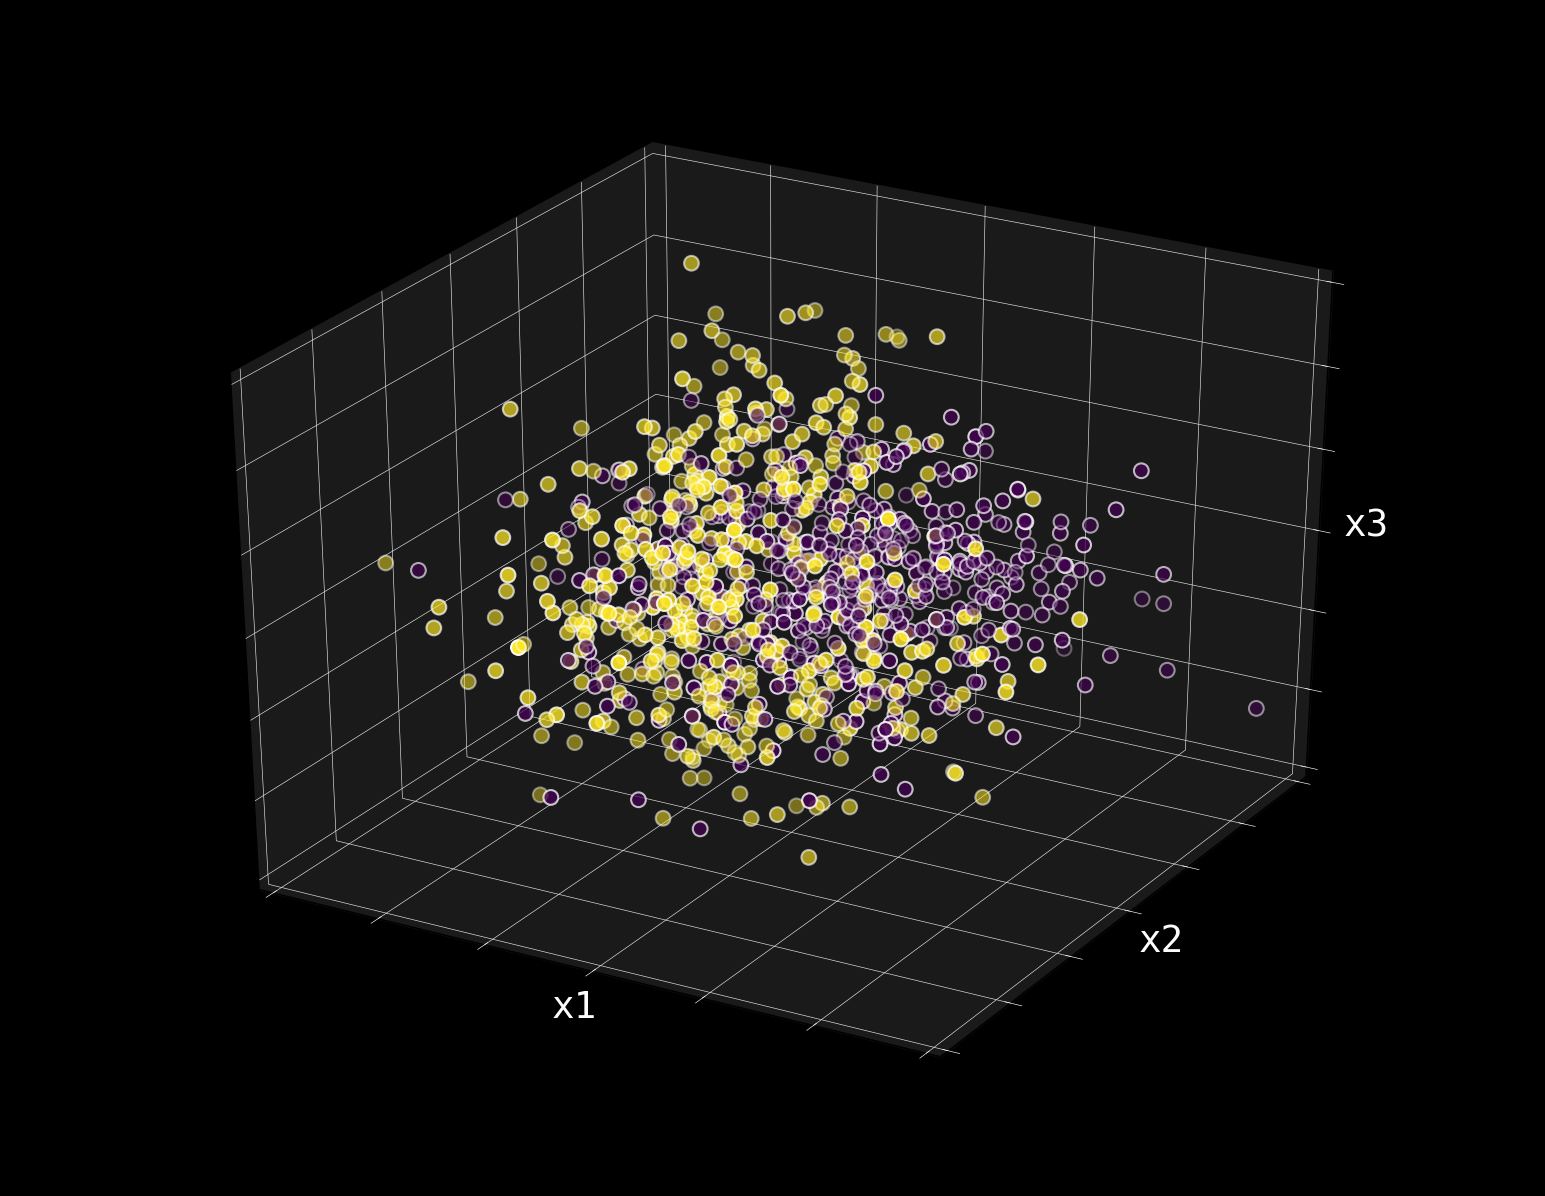

In [167]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= y, s = 50)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())

ax.xaxis.labelpad = -7
ax.yaxis.labelpad = -7
ax.zaxis.labelpad = -7

ax.w_xaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
ax.w_yaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
ax.w_zaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
#ax.patch.set_facecolor('red')
#ax.set_axis_bgcolor((0.2, 0.2, 0.2))

plt.savefig("img/fig_00_data_3d.png", facecolor=fig.get_facecolor(), edgecolor='none')

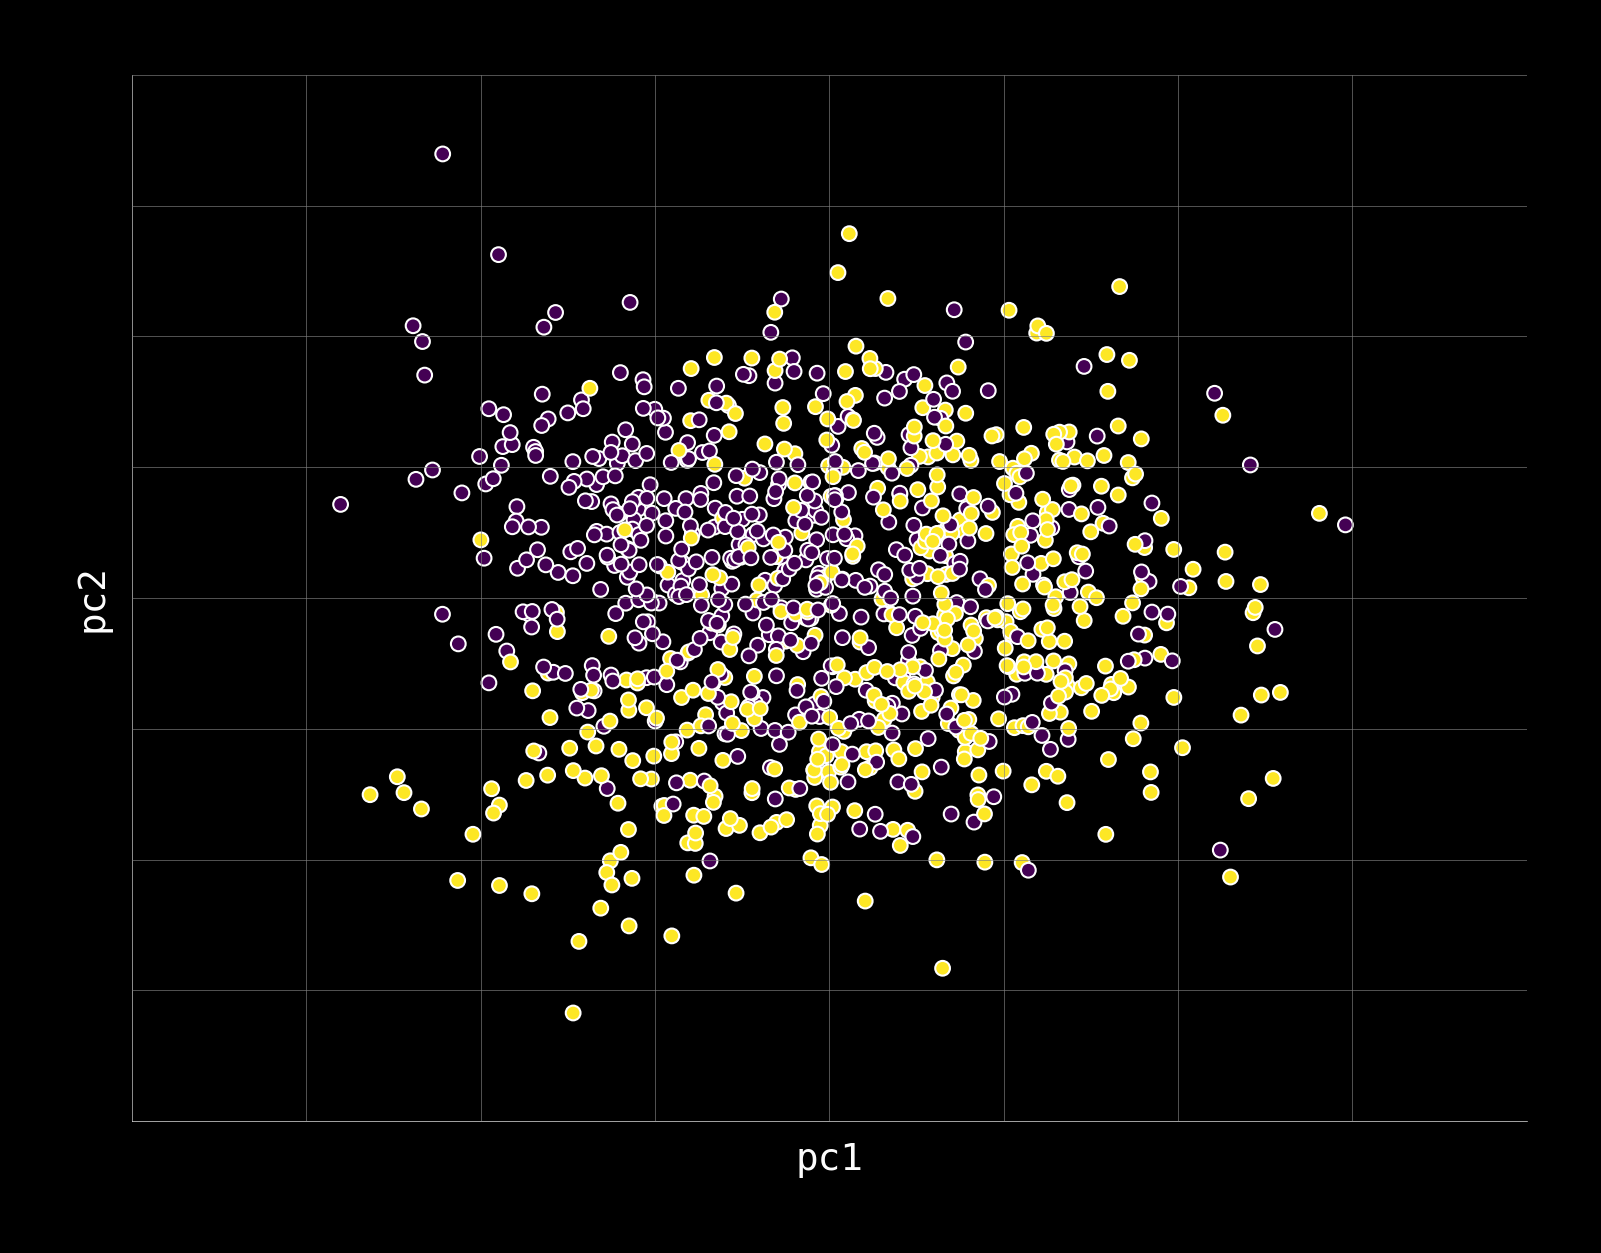

In [195]:
# Lets plot the data set in 2 dimensions
plt.scatter(X[:,3], X[:,4], c=y, s=50)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.xlim(-4,4)
plt.ylim(-4,4)
hide_spines()
plt.tick_params(labelbottom='off',labelleft='off')
#plt.axis("off")
plt.savefig("img/fig_01_data_2d.png")

## Start the Classifier

In [169]:
# Initiate the Classifiers
names = [
     # 0, 1, 2, 3  
    "Logistic (x1,x2)", "Logistic (x2,x3)", "Logistic (x1,x3)", "Logistic (pc1,pc2)",
    
    # 4, 5, 6, 7
    "Logistic (C=1)", "Logistic (C=1e-1)", "Logistic (C=1e-3)", "Logistic (C=1e-5)", 
    
    # 8, 9, 10, 11
    "Logistic", "SVM-Linear", "Decision Tree", "K Nearest Neighbour",
    
    # 12, 13, 14, 15
    "Patching", "Bagging", "Random Subspace", "Random Patches",
    
    # 16, 17, 18, 19
    "Decision Tree", "Bagging", "Random Forest", "Extremely Random",

    # 20, 21, 22, 23
    "Decision Tree", "Ada Boost", "Gradient Boosting (d=1)", "Gradient Boosting (d=2)",

    # 24, 25, 26, 27
    "Gaussian", "SVM - RBF", "Gradient Boosting", "Voting",
    
    # 28, 29, 30, 31
    "Gaussian", "SVM - RBF", "Gradient Boosting", "Stacking",

    
]

classifiers = [
    LogisticRegression(random_state = 123, n_jobs=-1),
    LogisticRegression(random_state = 123, n_jobs=-1),
    LogisticRegression(random_state = 123, n_jobs=-1),
    LogisticRegression(random_state = 123, n_jobs=-1),
    
    LogisticRegression(C=1, random_state = 123, n_jobs=-1),
    LogisticRegression(C=1e-1, random_state = 123, n_jobs=-1),
    LogisticRegression(C=1e-3, random_state = 123, n_jobs=-1), 
    LogisticRegression(C=1e-5, random_state = 123, n_jobs=-1),
    
    LogisticRegression(random_state = 123, n_jobs=-1),
    SVC(kernel='linear', probability=True),
    DecisionTreeClassifier(random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=0.5, bootstrap=False),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=0.5, bootstrap=True),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_features=1, bootstrap=False),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=0.5, max_features=1,
                      bootstrap=False),
    
    DecisionTreeClassifier(random_state=0),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=0.5, bootstrap=True),
    RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1),
    ExtraTreesClassifier(n_estimators=10, random_state=0, n_jobs=-1),
    
    DecisionTreeClassifier(random_state=0),
    AdaBoostClassifier(n_estimators=10, random_state=0),
    GradientBoostingClassifier(n_estimators=10, max_depth=1, random_state=0),
    GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=0),
    
    GaussianNB(priors = [0.5,0.5]),
    SVC(kernel='rbf', probability=True),
    GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=0),
    VotingClassifier(estimators=[('dt',  GaussianNB(priors = [0.5,0.5])), 
                                 ('knn', SVC(kernel='rbf', probability=True)),
                                 ('svc', GradientBoostingClassifier(n_estimators=10, 
                                                                    max_depth=2, random_state=0))
                                ],
                      voting='soft', weights=[1, 1, 1]),
    
    GaussianNB(priors = [0.5,0.5]),
    SVC(kernel='rbf', probability=True),
    GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=0),
    StackingClassifier(classifiers=[GaussianNB(priors = [0.5,0.5]),
                                    SVC(kernel='rbf', probability=True),
                                    GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=0),
                                    ], 
                       meta_classifier=LogisticRegression(random_state = 123, n_jobs=-1)),
    
    
    GaussianNB(priors = [0.5,0.5]), 
    MLPClassifier(hidden_layer_sizes=2, activation="logistic")
    
]

## Make a Mesh

In [170]:
# Create mesh points for plotting the boundaries for pca1 and pca2
def mesh(L):
    step = 0.1  # step size in the mesh
    a_min, a_max = L[:, 0].min() - .5, L[:, 0].max() + .5
    b_min, b_max = L[:, 1].min() - .5, L[:, 1].max() + .5
    aa, bb = np.meshgrid(np.arange(a_min, a_max, step),
                         np.arange(b_min, b_max, step))
    aabb = np.c_[aa.ravel(), bb.ravel()]
    shape = aa.shape
    return aa, bb, aabb, shape

## Make a Simple Model

In [171]:
# Create array to store the predictions and score
y_pred = np.empty([y_test.shape[0],40])
scores = np.empty([40])

In [172]:
# Create combination - (x1,x2), (x2,x3), (x1,x3), (pca1, pca2)
f = [[0,1],[1,2],[0,2],[3,4]]

In [173]:
X[:,f[1]]

array([[ 0.20461286, -0.59215194],
       [ 0.22513208,  1.35838738],
       [-1.58666129,  1.25942329],
       ..., 
       [-0.35538501, -0.09158178],
       [-0.72794622, -1.78000733],
       [-0.66631763, -0.58273359]])

In [174]:
X[:,f[3]]

array([[ -5.78545700e-01,   1.47208919e+00],
       [ -3.02642275e-01,  -1.71549002e+00],
       [  7.79648730e-01,  -1.17442833e+00],
       ..., 
       [  3.51720696e-01,  -3.58085912e-04],
       [  1.97505137e+00,   3.71782096e-01],
       [  1.38373743e-01,   1.35791180e+00]])

In [175]:
# Make a simple model - Logistics Regression
def classifier_simple_plot(n1, n2, figname):
    # Run the classifier, score and plot them
    for idx in np.arange(n1,n2):
        clf = classifiers[idx]
        clf.fit(X_train[:,f[idx]], y_train)
        y_pred[:,idx] = clf.predict_proba(X_test[:,f[idx]])[:,1]
        #auc = roc_auc_score(y_test, y_pred[:,idx])
        auc = cross_val_score(clf, X_train[:,f[idx]], y_train, cv=5, scoring='roc_auc').mean()
        print(idx, f[idx], auc, names[idx])

        aa, bb, aabb, shape = mesh(X[:,f[idx]])
        
        Z = clf.predict_proba(aabb)[:, 1]
        Z = Z.reshape(shape)

        plt.subplot(2, 2, idx - n1 + 1)
        plt.scatter(X[:,f[idx][0]], X[:,f[idx][1]], c=y, s=50)
        plt.contourf(aa, bb, Z, alpha=0.8)
        plt.title(names[idx])
        plt.text(aa.max() - .3, bb.min() + .3, 'AUC = ' + ('%.4f' % auc).lstrip('0'), size=18,
            horizontalalignment='right', color = "black")
        plt.axis("off")
        idx += 1
    # Save the plot    
    plt.savefig("img/" + figname + ".png")

0 [0, 1] 0.73959209757 Logistic (x1,x2)
1 [1, 2] 0.688888041612 Logistic (x2,x3)
2 [0, 2] 0.680835953861 Logistic (x1,x3)
3 [3, 4] 0.737328755758 Logistic (pc1,pc2)
CPU times: user 3.16 s, sys: 129 ms, total: 3.29 s
Wall time: 3.12 s


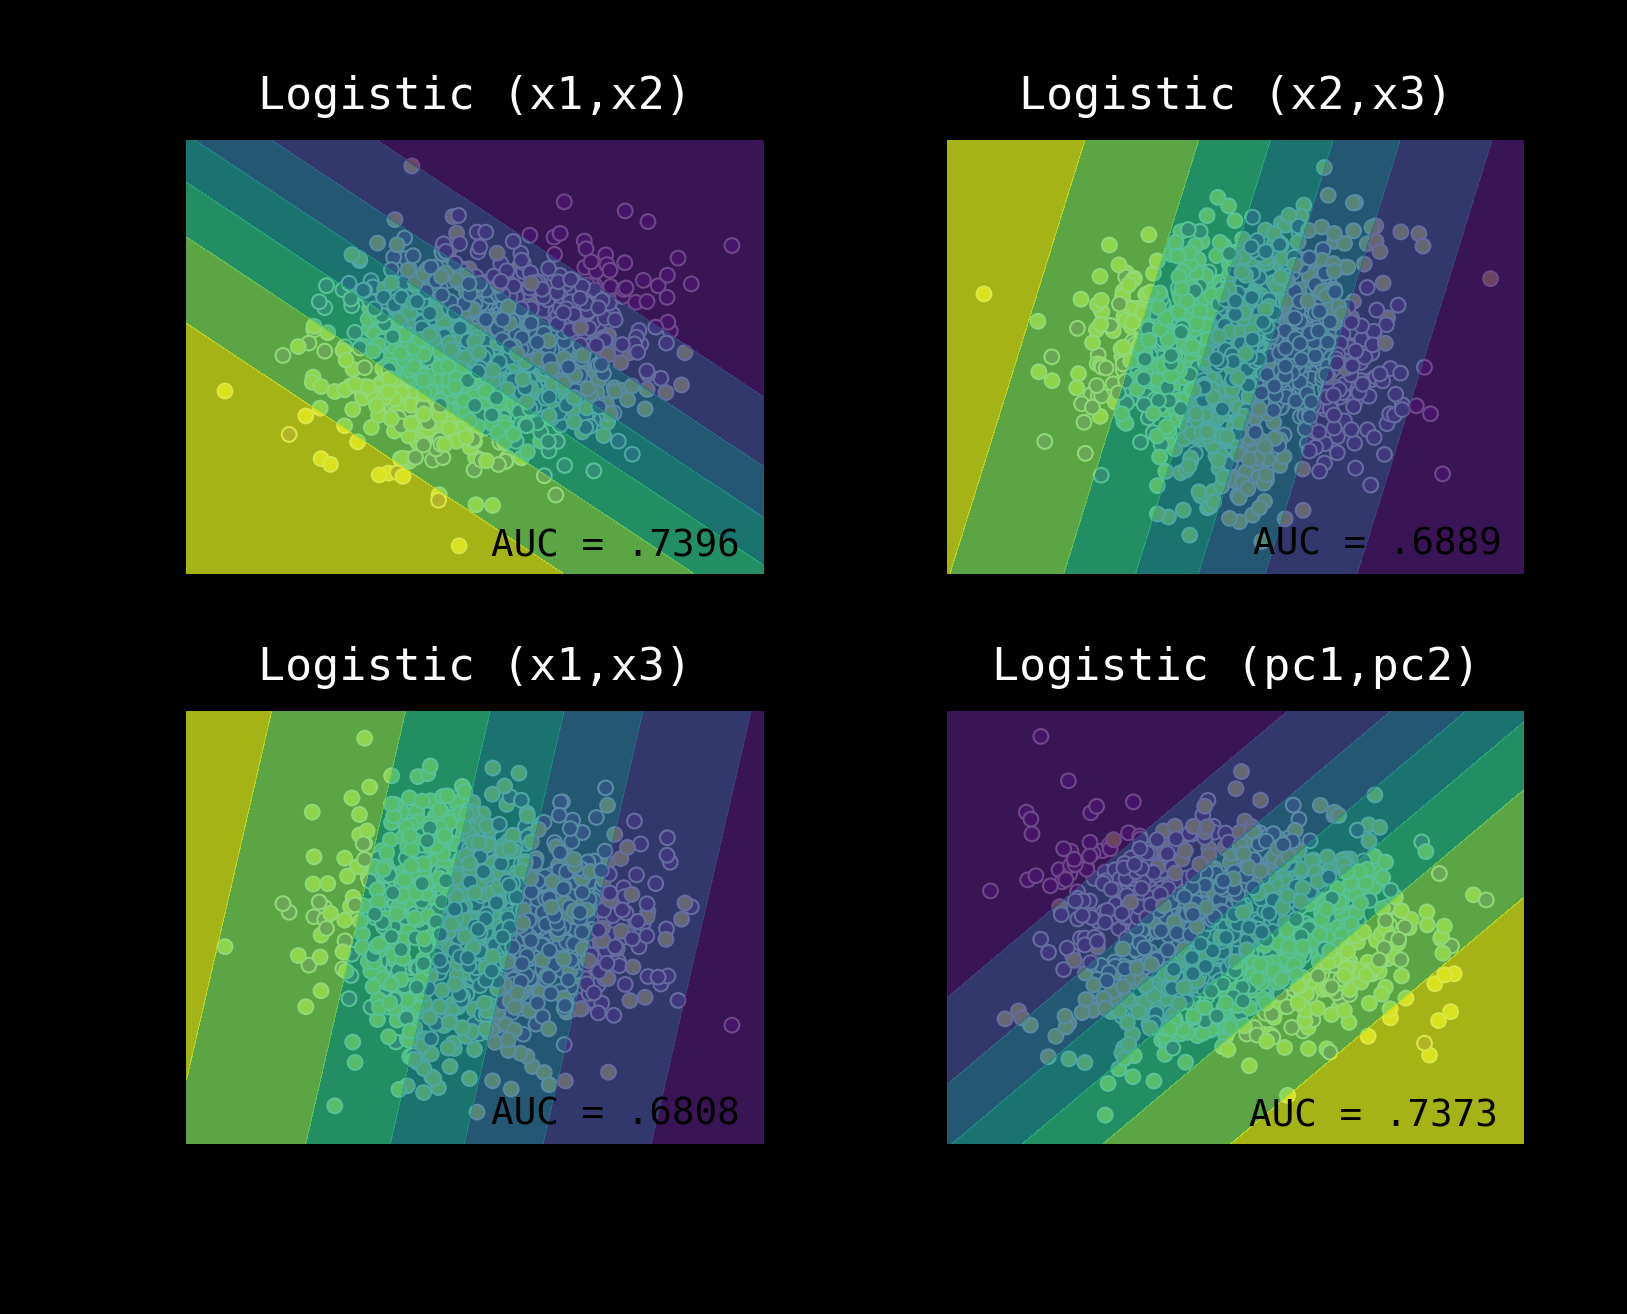

In [176]:
%%time
classifier_simple_plot(0, 4, "fig_02_simple_models")

## Run Multiple Classifier - PCA1 and PCA2

In [177]:
X[:,3:5]

array([[ -5.78545700e-01,   1.47208919e+00],
       [ -3.02642275e-01,  -1.71549002e+00],
       [  7.79648730e-01,  -1.17442833e+00],
       ..., 
       [  3.51720696e-01,  -3.58085912e-04],
       [  1.97505137e+00,   3.71782096e-01],
       [  1.38373743e-01,   1.35791180e+00]])

In [178]:
xx4, xx5, xx4xx5, xx4Shape = mesh(X[:,3:5])

In [179]:
def classifier_plot(n1, n2, figname):
    # Run the classifier, score and plot them
    for idx in np.arange(n1,n2):
        
        clf = classifiers[idx]
        clf.fit(X_train[:,3:5], y_train)
        y_pred[:,idx] = clf.predict_proba(X_test[:,3:5])[:,1]
        #auc = roc_auc_score(y_test, y_pred[:,idx])
        auc = cross_val_score(clf, X_train[:,3:5], y_train, cv=5, scoring='roc_auc').mean()
        
        Z = clf.predict_proba(xx4xx5)[:, 1]
        Z = Z.reshape(xx4.shape)

        plt.subplot(2, 2, idx - n1 + 1)
        plt.scatter(X[:,3], X[:,4], c=y, s=50)
        plt.contourf(xx4, xx5, Z, alpha=0.8)
        plt.title(names[idx])
        plt.text(xx4.max() - .3, xx5.min() + .3, 'AUC = ' + ('%.4f' % auc).lstrip('0'), size=18,
            horizontalalignment='right', color = "black")
        plt.axis("off")
        idx += 1
    # Save the plot    
    plt.savefig("img/" + figname + ".png")

CPU times: user 3.07 s, sys: 73.8 ms, total: 3.14 s
Wall time: 2.79 s


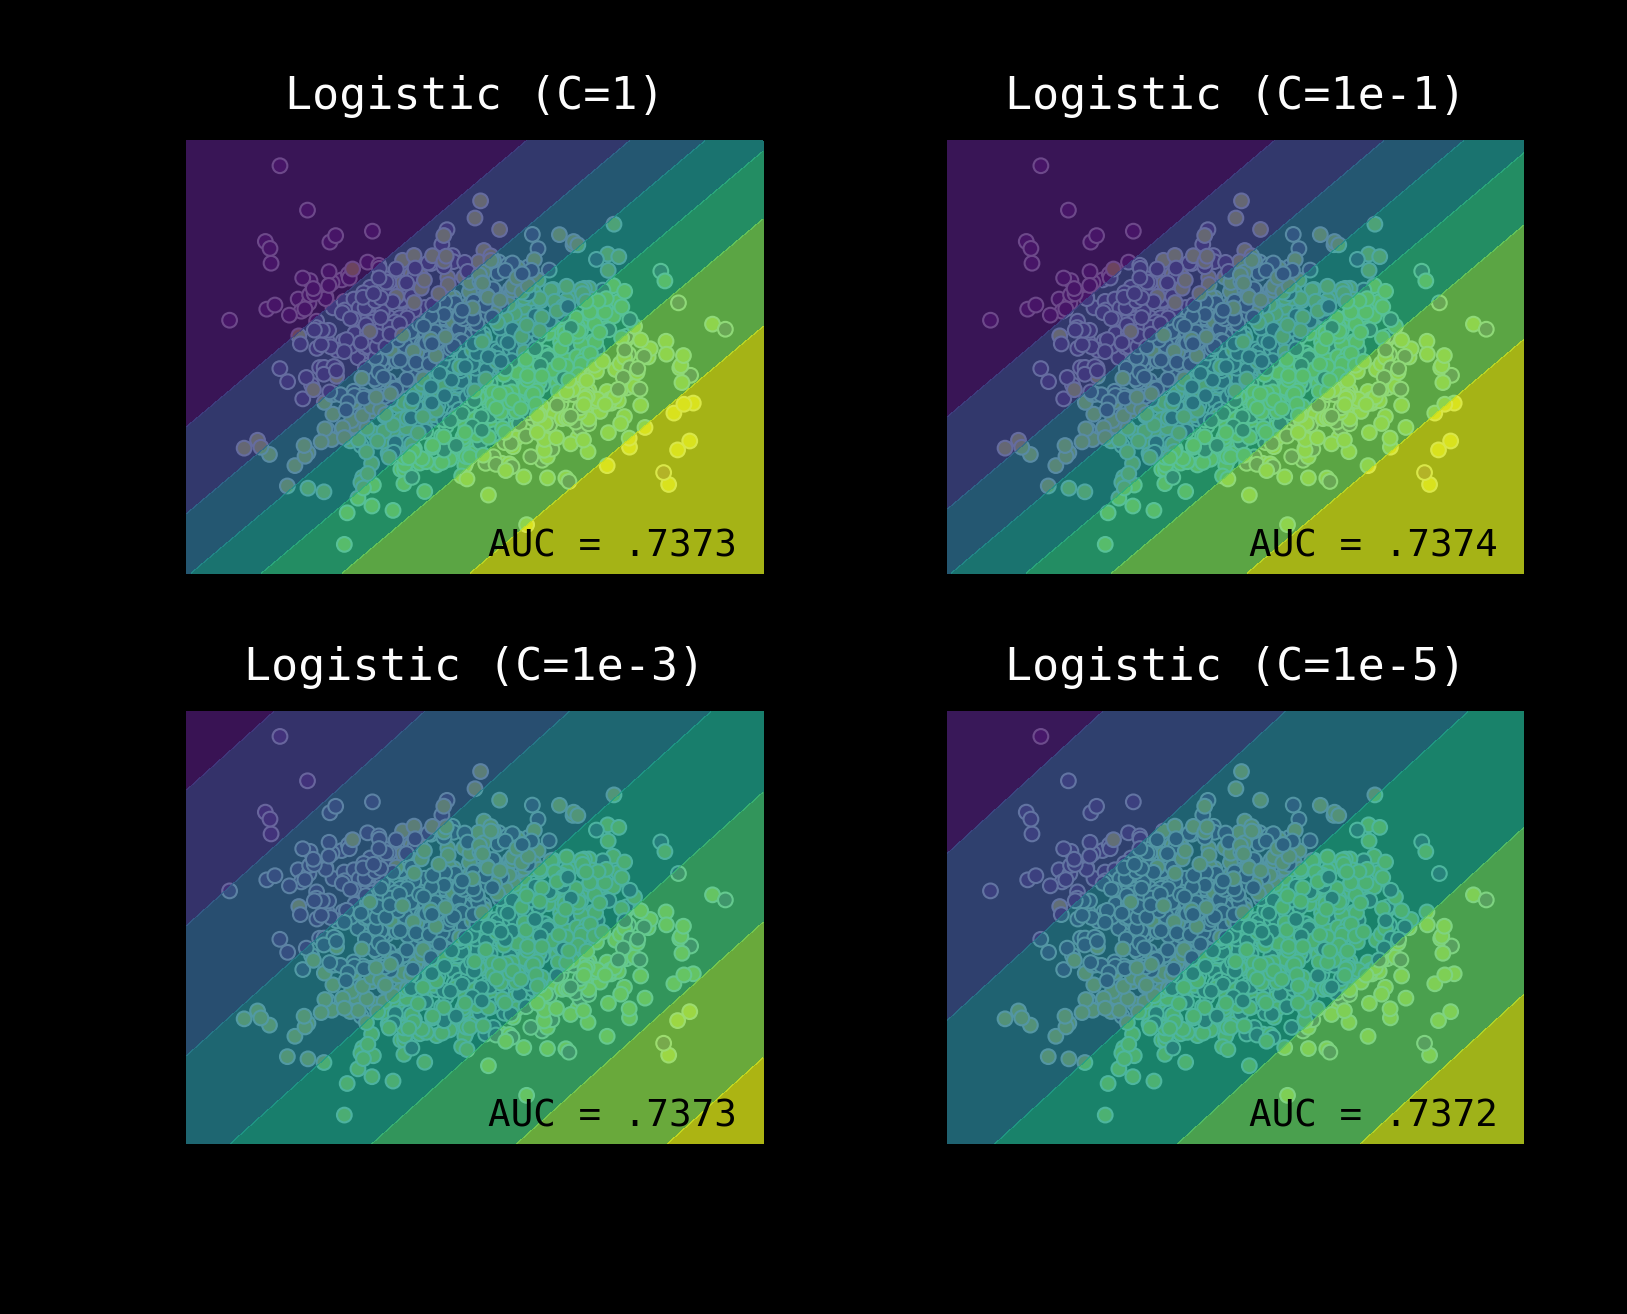

In [180]:
%%time
classifier_plot(4,8, "fig_03_simple_params")

CPU times: user 3.33 s, sys: 97.3 ms, total: 3.42 s
Wall time: 3.53 s


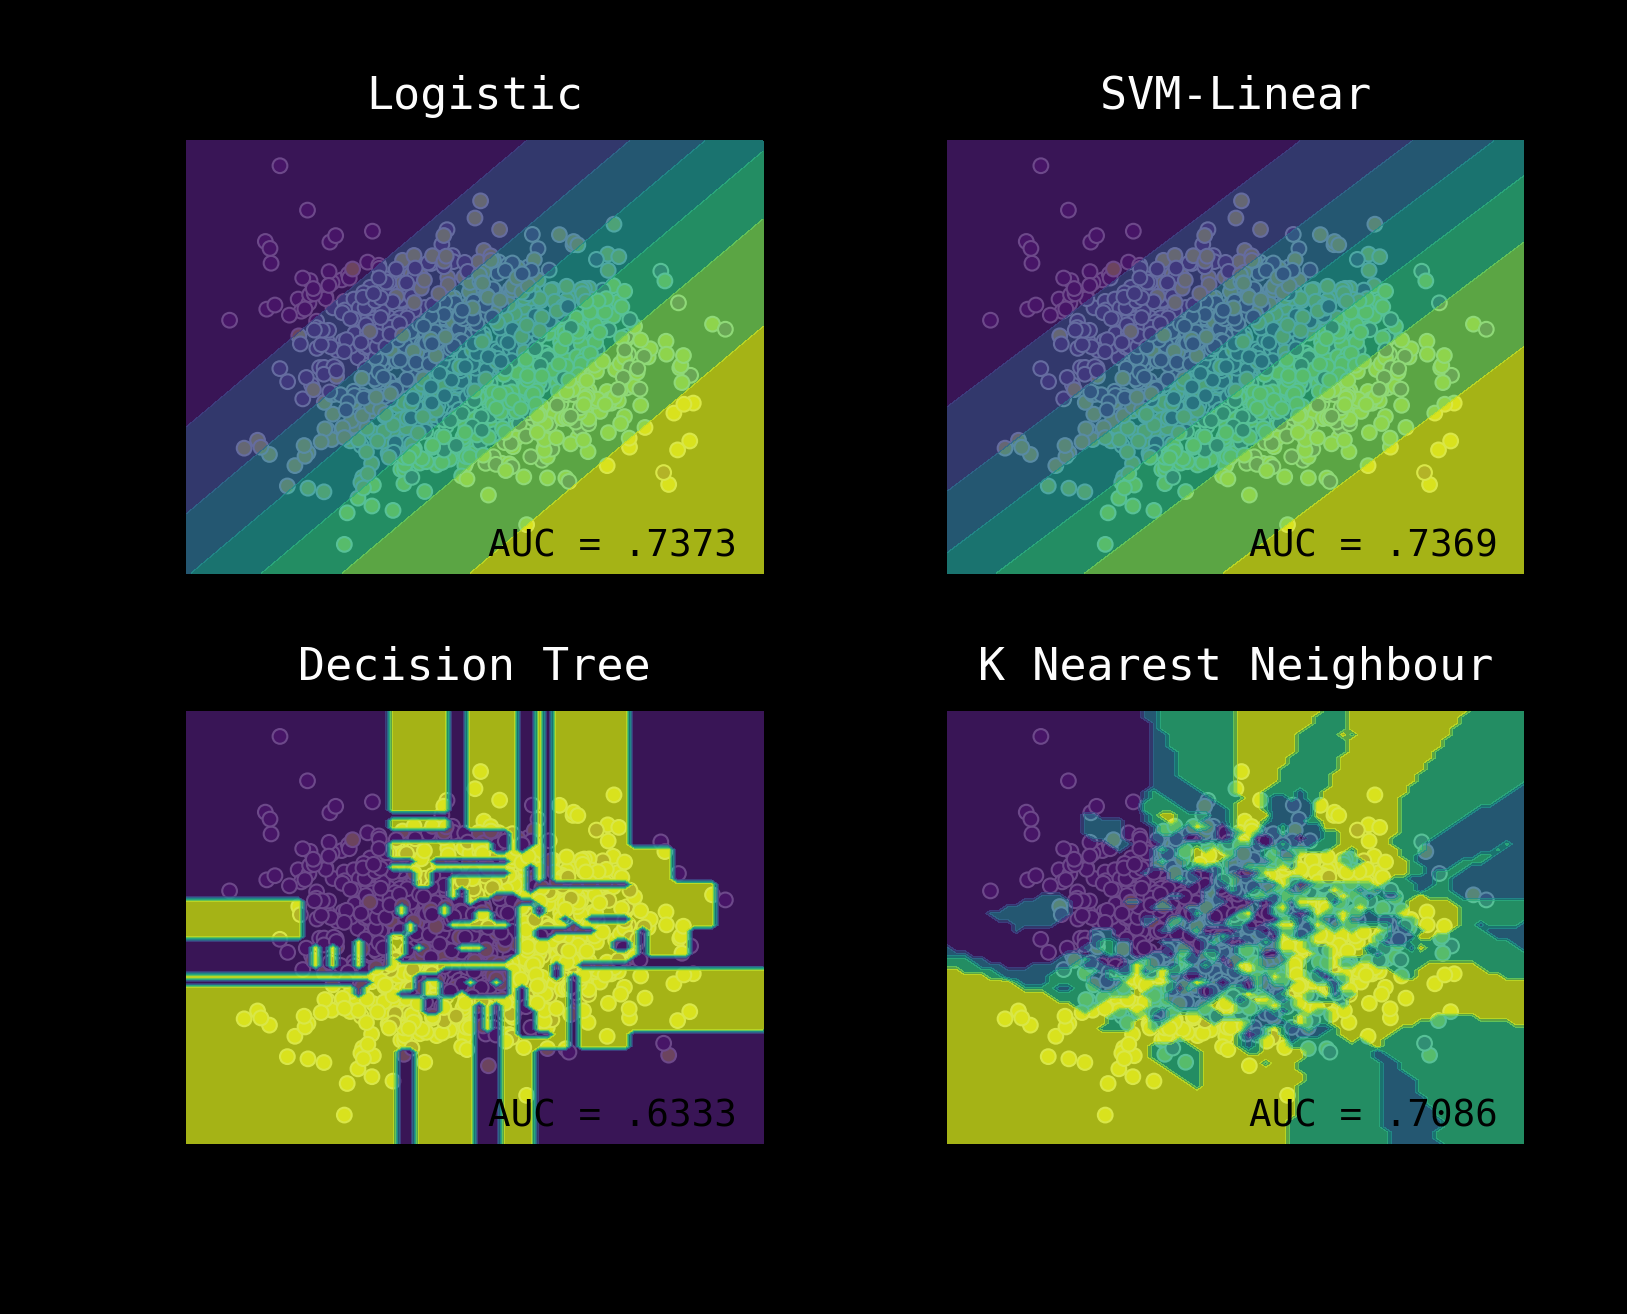

In [181]:
%%time
classifier_plot(8, 12, "fig_04_many_models")

## Patching, Bagging, RandomSubspace, Random Patches

CPU times: user 3.38 s, sys: 76.4 ms, total: 3.46 s
Wall time: 3.74 s


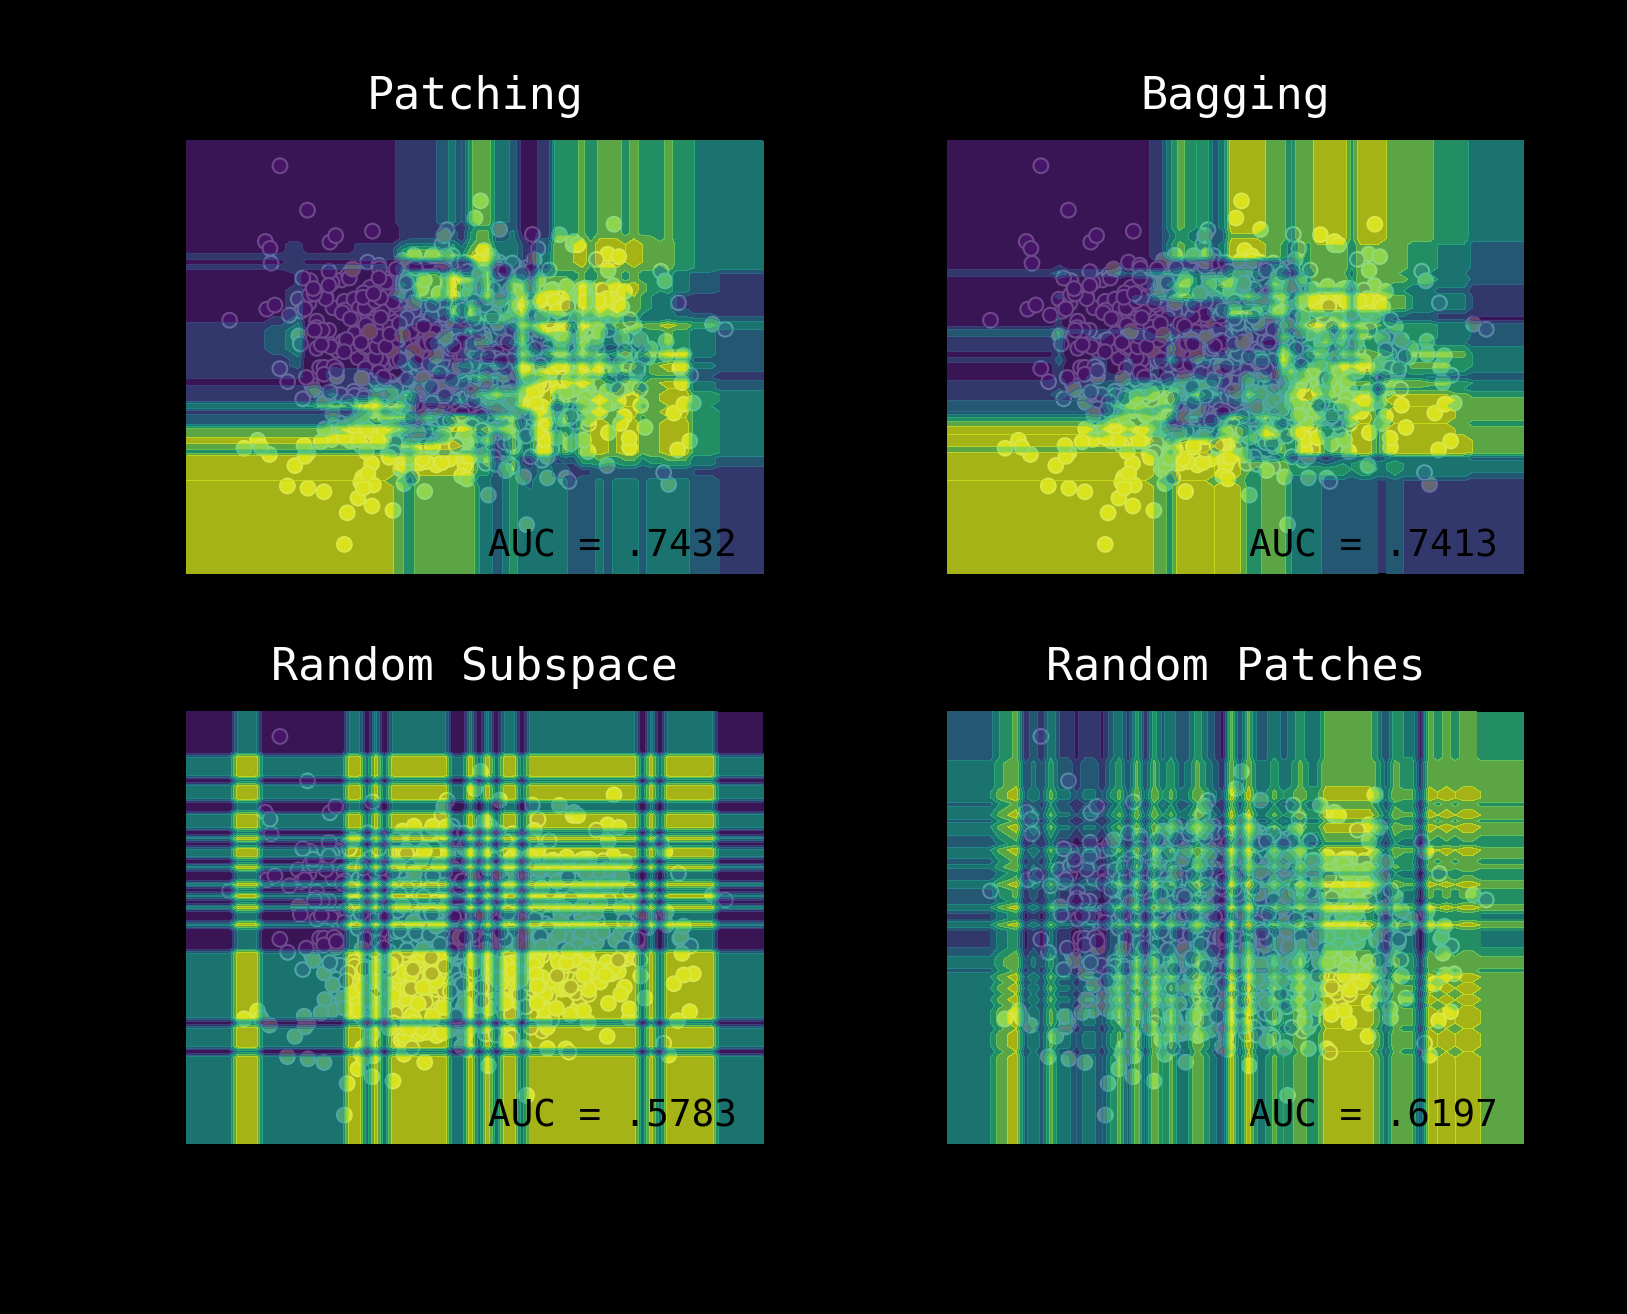

In [182]:
%%time
classifier_plot(12,16, "fig_05_bagging")

## Randomised Forest

CPU times: user 3.38 s, sys: 143 ms, total: 3.52 s
Wall time: 6.13 s


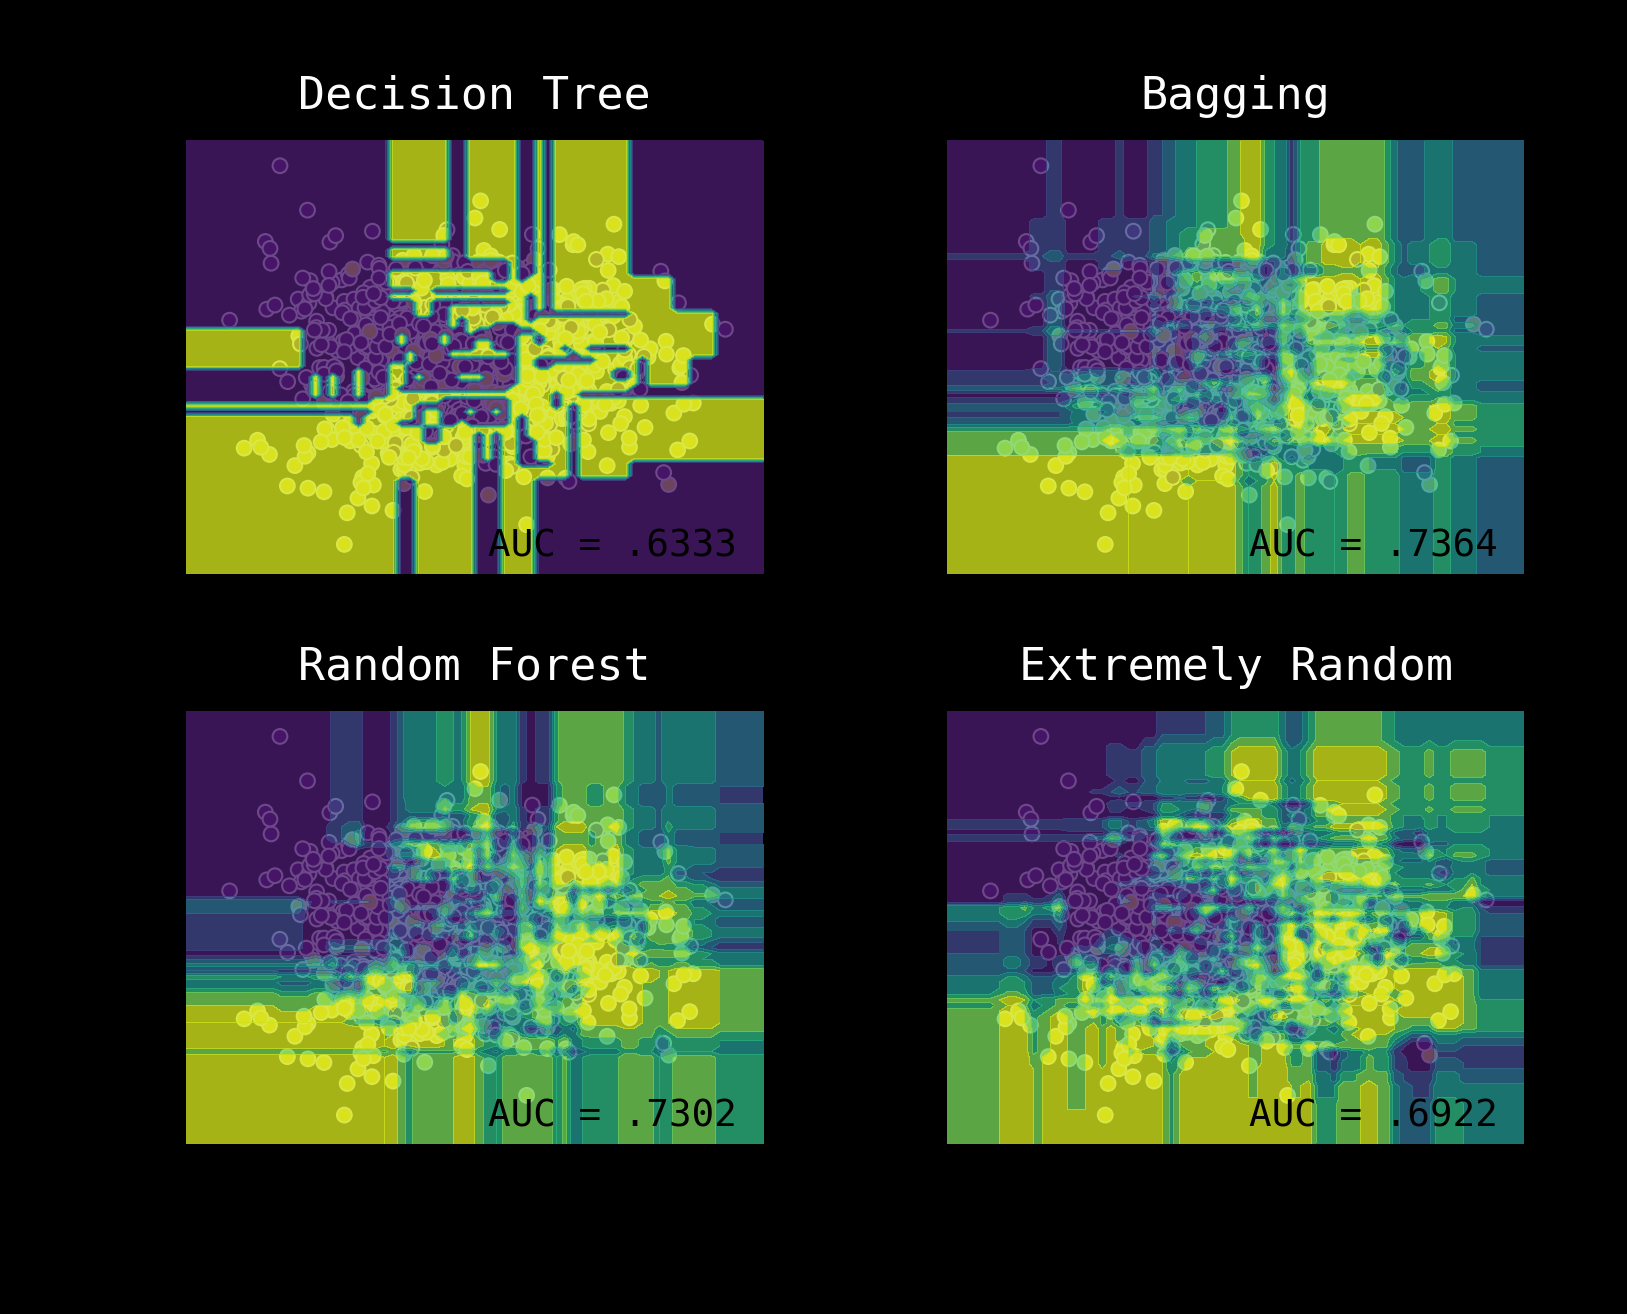

In [183]:
%%time
classifier_plot(16,20, "fig_06_forest")

## Boosting

CPU times: user 2.76 s, sys: 86 ms, total: 2.84 s
Wall time: 3.21 s


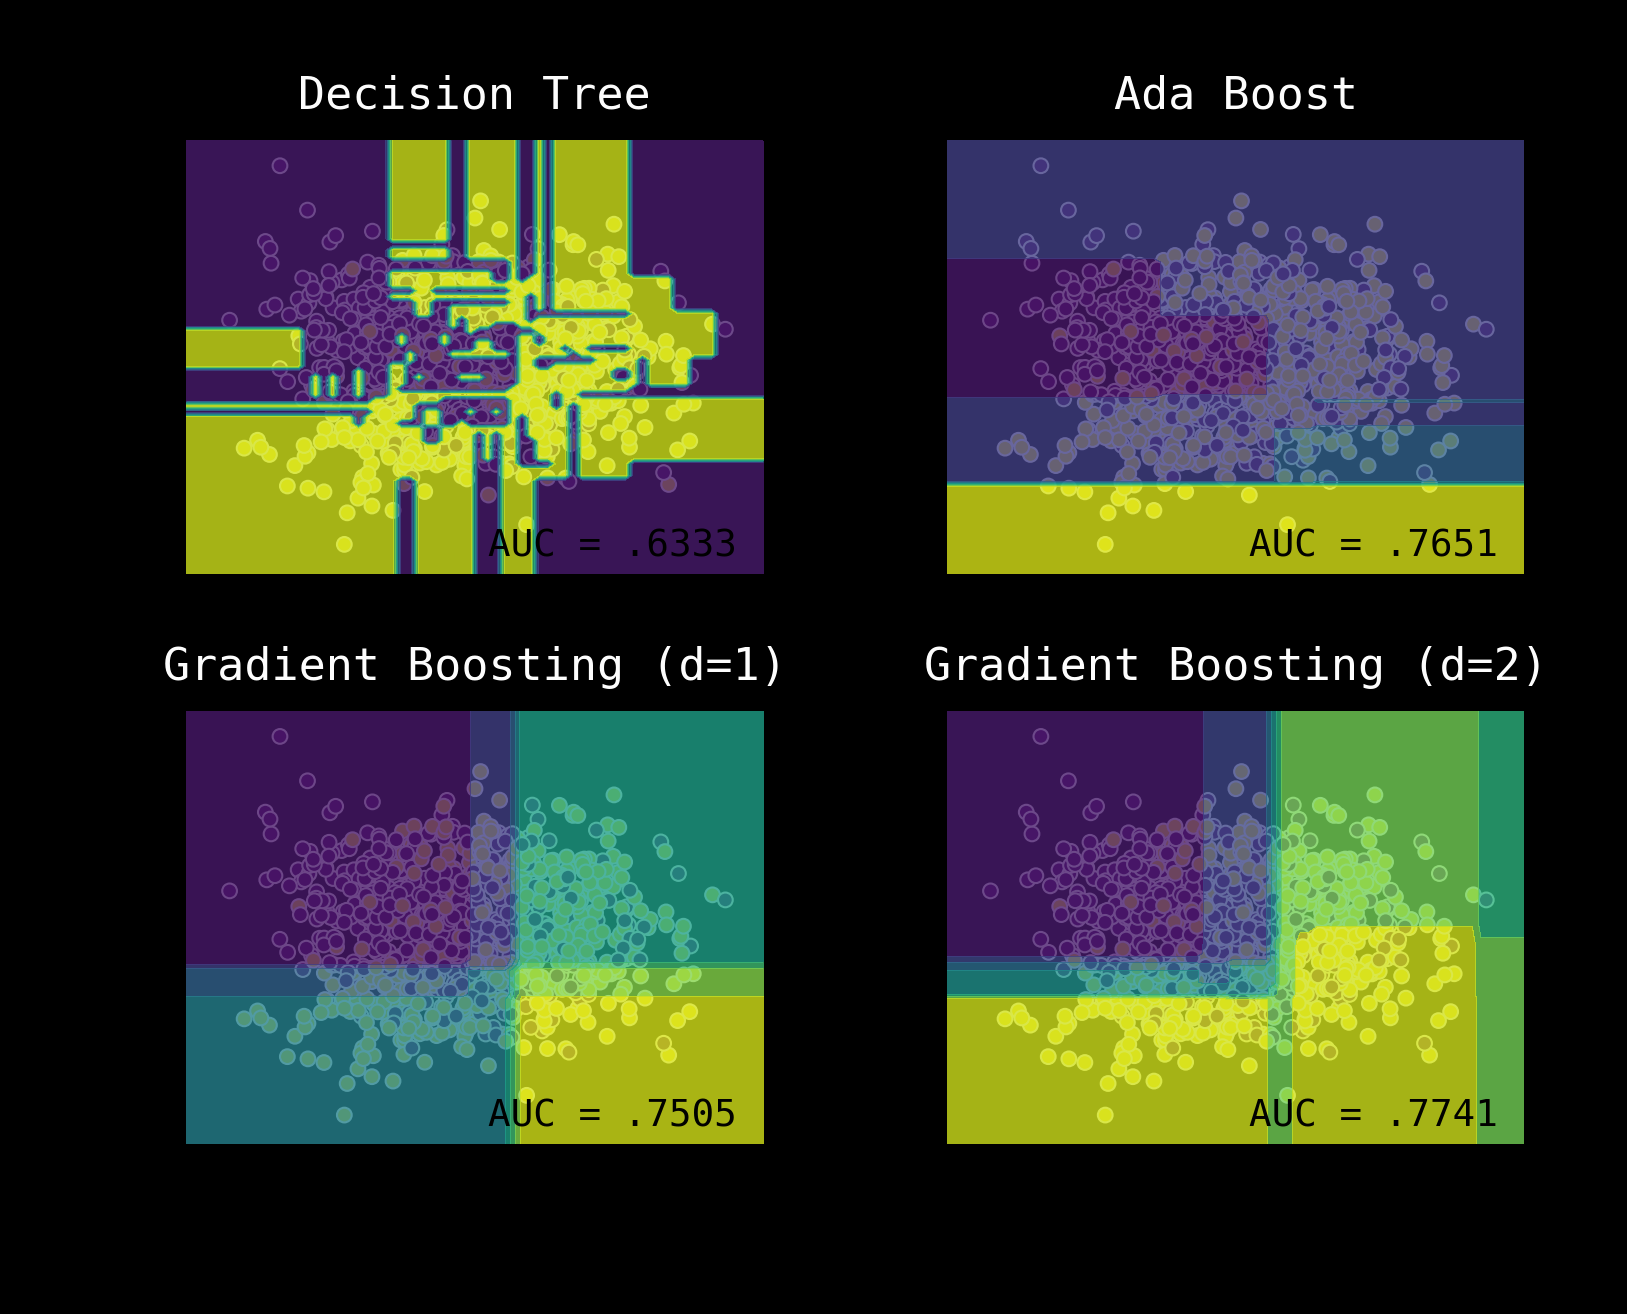

In [184]:
%%time
classifier_plot(20,24, "fig_07_Boosting")

##  Voting

CPU times: user 3.9 s, sys: 107 ms, total: 4.01 s
Wall time: 4.32 s


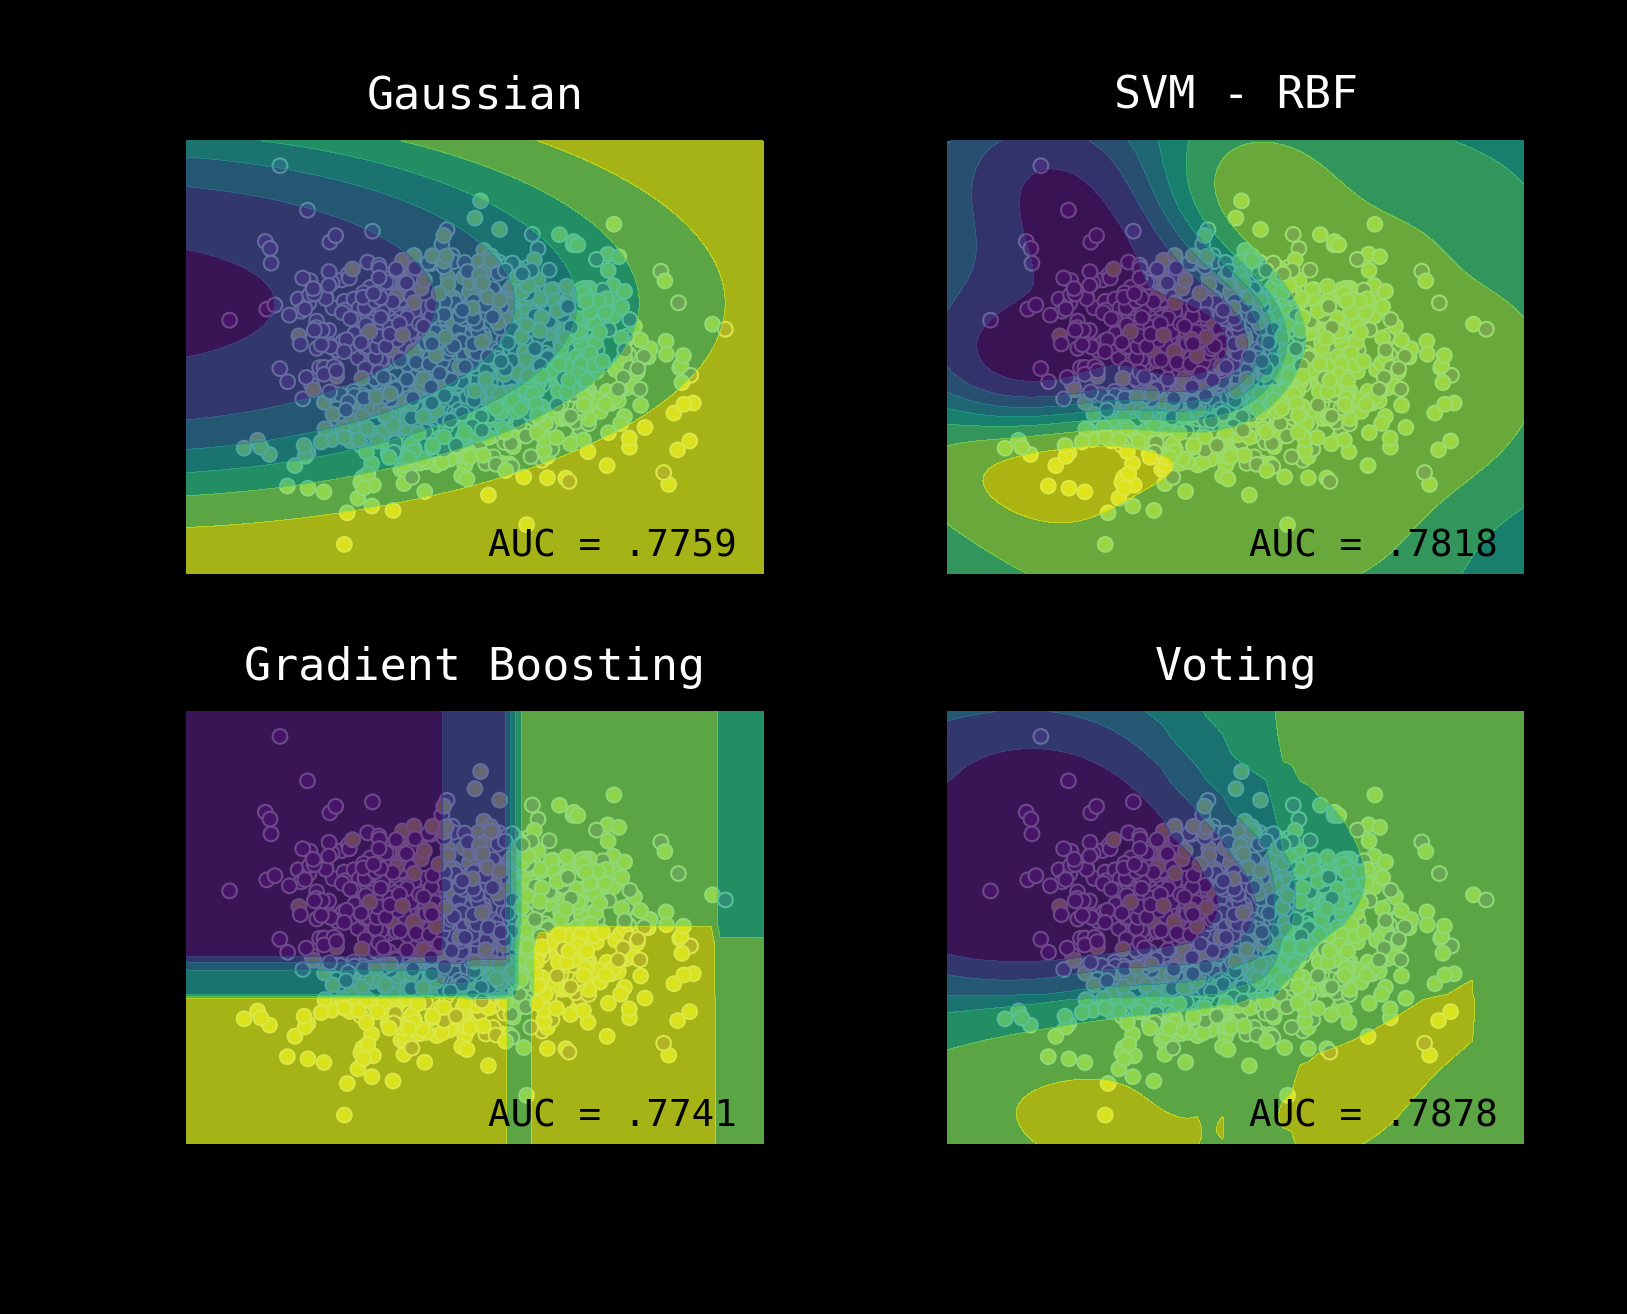

In [185]:
%%time
classifier_plot(24,28, "fig_08_voting")

## Stacking

CPU times: user 4.06 s, sys: 115 ms, total: 4.18 s
Wall time: 4.35 s


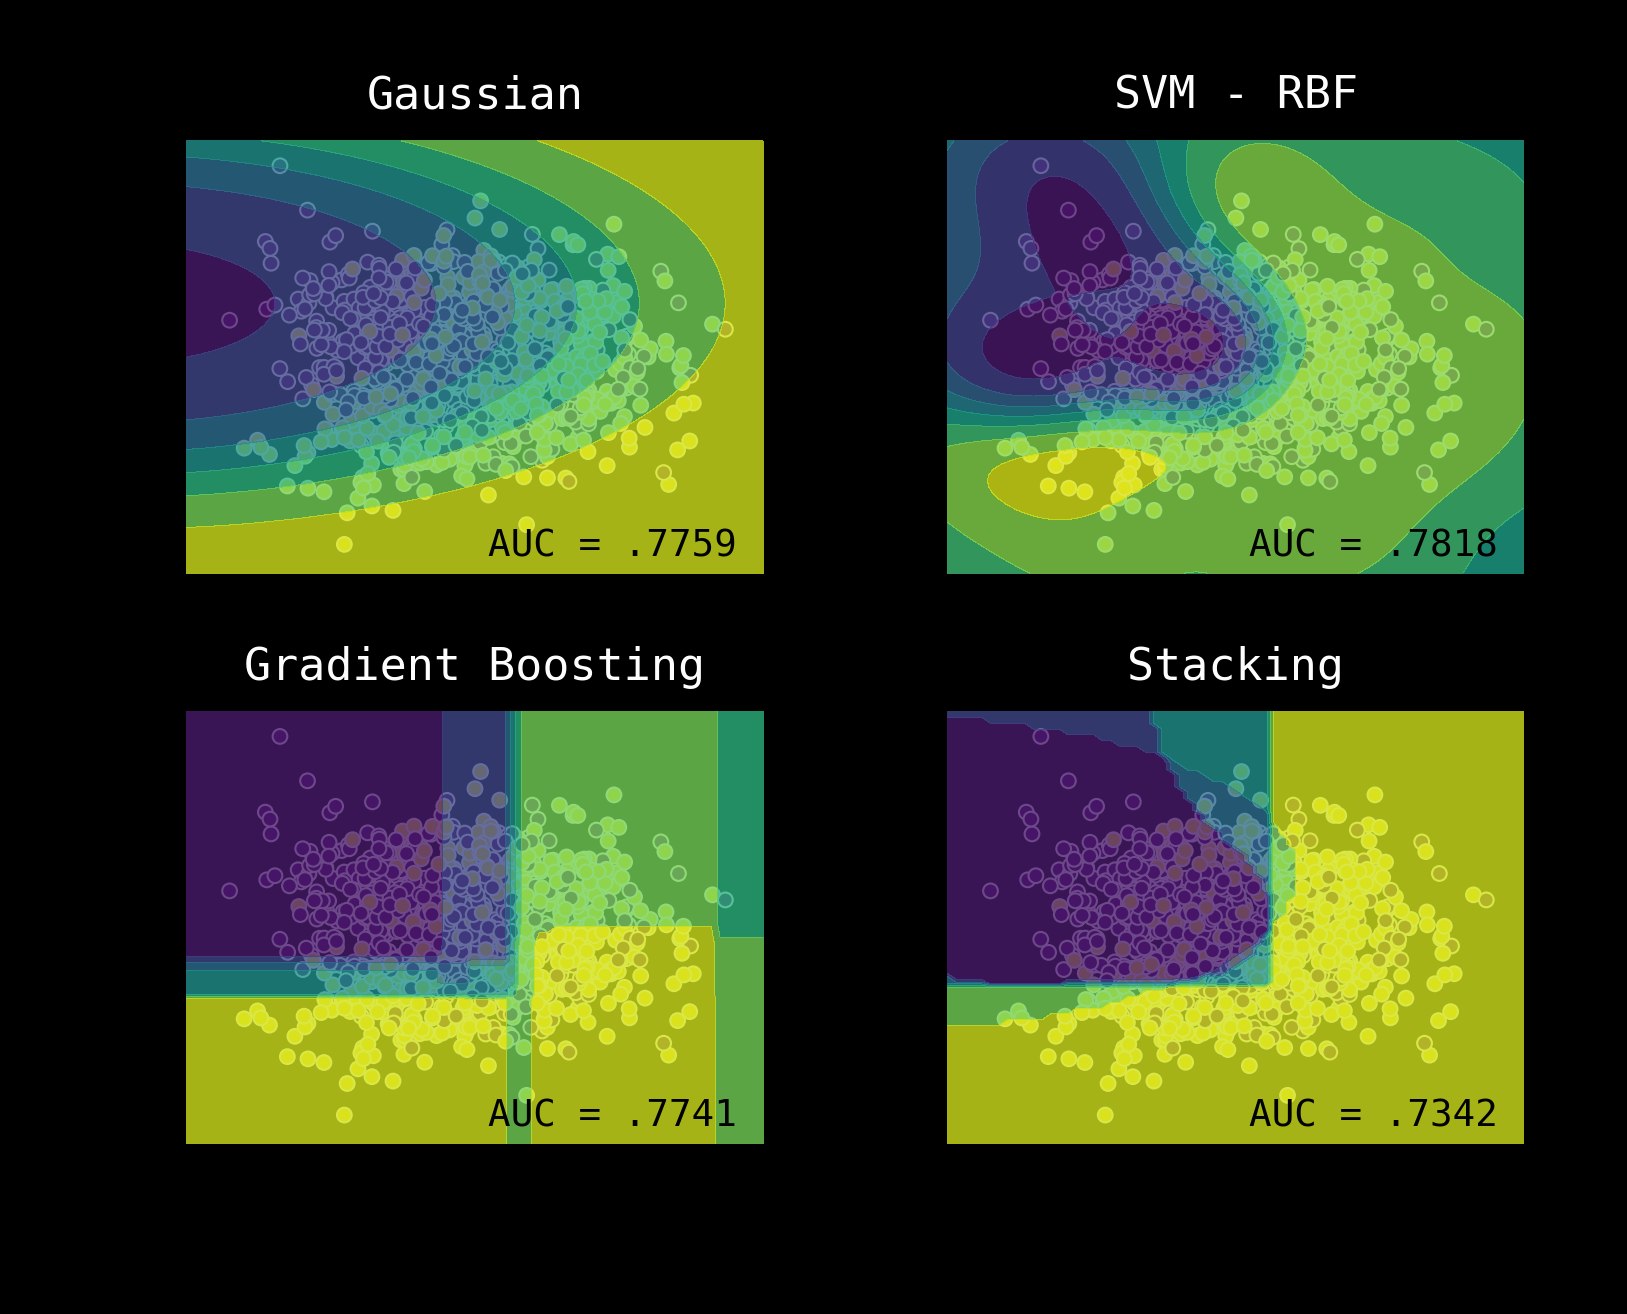

In [186]:
%%time
classifier_plot(28,32, "fig_09_stacking")